<a href="https://colab.research.google.com/github/AKookani/Knowledge_Graph/blob/main/Knowledge_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install networkx pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.6 MB/s eta 0:00:00


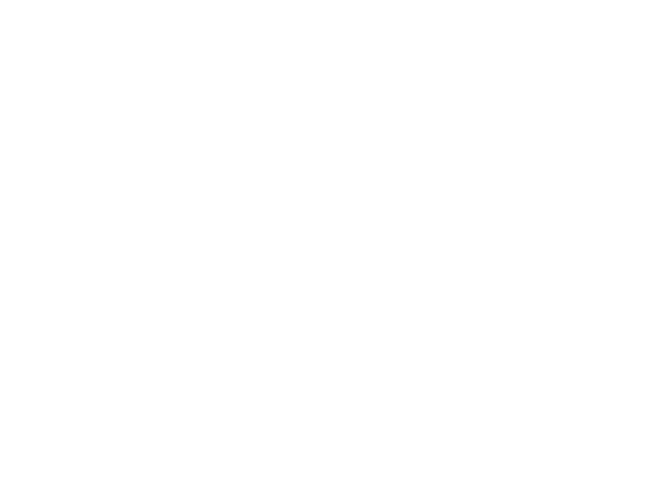

In [3]:
import networkx as nx
from matplotlib import pyplot as plt

G = nx.Graph()
DG = nx.DiGraph()

pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()

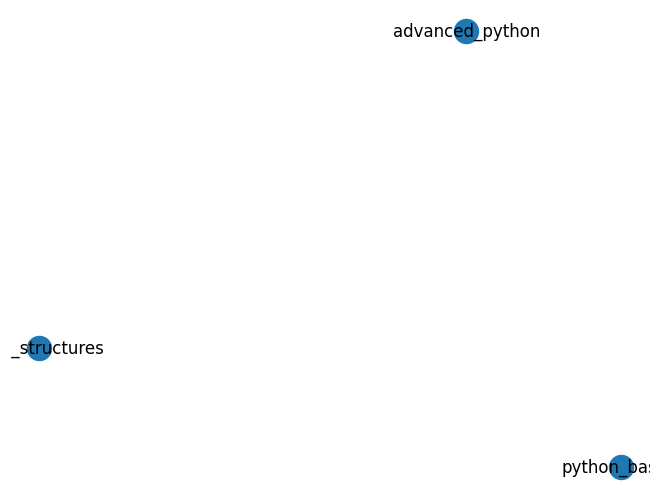

In [4]:
G.add_node('python_basics')

G.add_nodes_from(['data_structures', 'advanced_python'])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

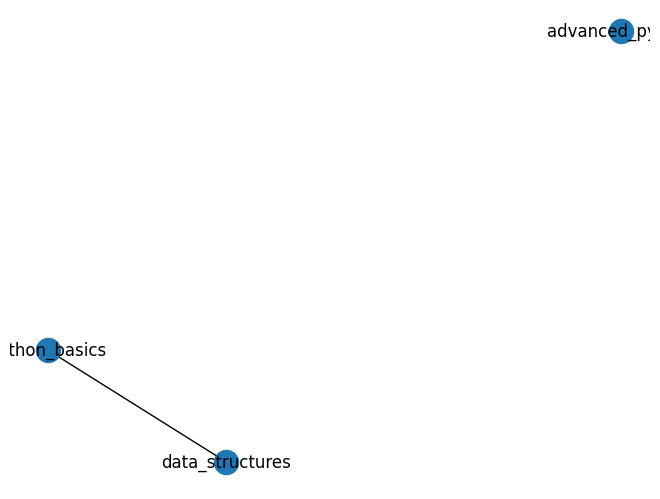

In [5]:
G.add_edge('python_basics', 'data_structures')

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

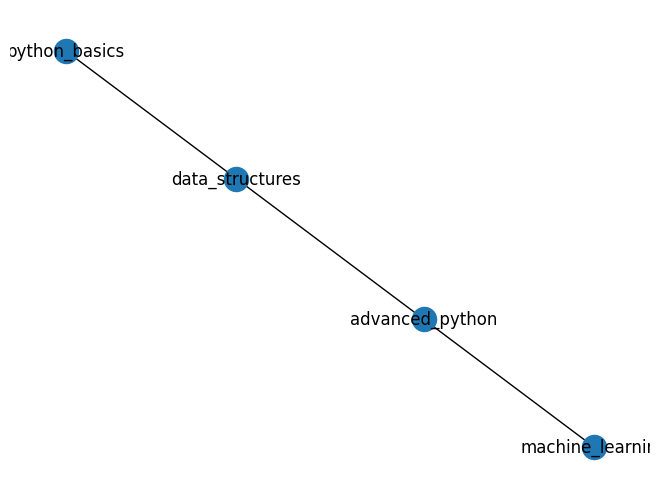

In [6]:
G.add_edges_from([
    ('machine_learning', 'advanced_python'),
    ('data_structures', 'advanced_python')
    ])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

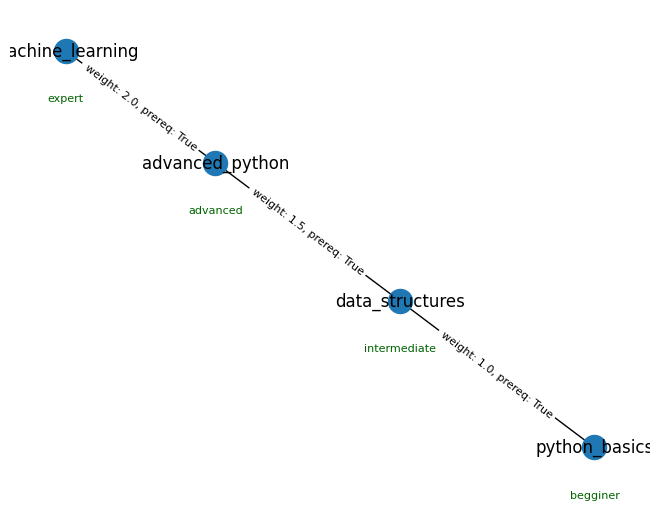

In [12]:
topics = {
    'python_basics': {'difficulty': 'begginer', 'description': 'Basic Python concepts'},
    'data_structures': {'difficulty': 'intermediate', 'description': 'Data structure in Python'},
    'advanced_python': {'difficulty': 'advanced', 'description': 'Advanced Python techniques'},
    'machine_learning': {'difficulty': 'expert', 'description': 'Introduction to ML'}
}

for node, attrs in topics.items():
  G.nodes[node].update(attrs)

edge_attributes = {
    ('python_basics', 'data_structures'): {'weight': 1.0, 'prerequisite': True},
    ('data_structures', 'advanced_python'): {'weight': 1.5, 'prerequisite': True},
    ('advanced_python', 'machine_learning'): {'weight': 2.0, 'prerequisite': True}
}

for edge, attrs in edge_attributes.items():
  G.edges[edge].update(attrs)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

node_labels = {node: data['difficulty'] for node, data in G.nodes(data=True)}
for node, (x, y) in pos.items():
  plt.text(x, y - 0.1, node_labels[node], fontsize=8, ha='center', color='darkgreen')

edge_labels = {(u, v): f"weight: {d['weight']}, prereq: {d['prerequisite']}" for u, v, d in G.edges(data=True)}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()

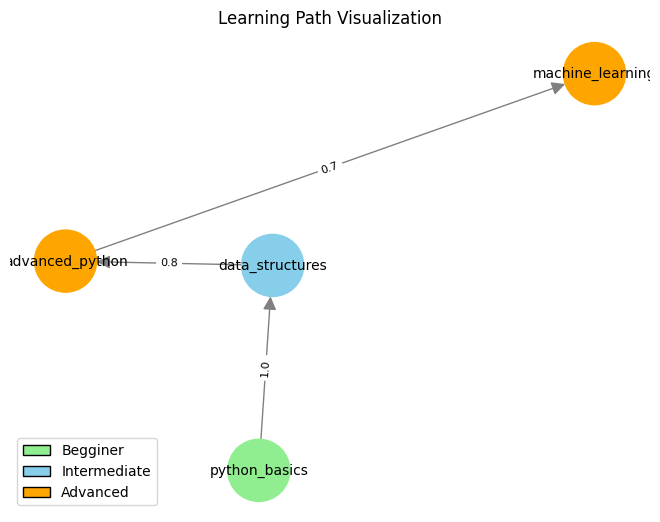

In [15]:
topics = {
    'python_basics': {'difficulty': 'begginer'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'}
}

relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7})
]

G = nx.DiGraph()
for topics, metadata in topics.items():
  G.add_node(topics, **metadata)
G.add_edges_from(relationships)

pos = nx.spring_layout(G)

node_colors = {
    'begginer': 'lightgreen',
    'intermediate': 'skyblue',
    'advanced': 'orange'
}
node_color_list = [node_colors[data['difficulty']] for _, data in G.nodes(data=True)]

nx.draw(
    G, pos, with_labels=True, node_color=node_color_list,
    node_size=2000, font_size=10, arrowsize=20, edge_color='gray'
)

edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightgreen', edgecolor='black', label='Begginer'),
    Patch(facecolor='skyblue', edgecolor='black', label='Intermediate'),
    Patch(facecolor='orange', edgecolor='black', label='Advanced')
]
plt.legend(handles=legend_elements, loc='lower left')

plt.title("Learning Path Visualization", fontsize=12)
plt.show()

In [17]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

print(f"Neighbors of 'python_basics': {list(G.neighbors('python_basics'))}")

print(f"Degree of 'data_structures': {G.degree('data_structures')}")

Number of nodes: 4
Number of edges: 3
Neighbors of 'python_basics': ['data_structures']
Degree of 'data_structures': 2


Shortest path 1 from 'python_basics' to 'machine_learning': ['python_basics', 'data_structures', 'advanced_python', 'machine_learning']
Shortest path 2 from 'python_basics' to 'deep_learning': ['python_basics', 'data_structures', 'advanced_python', 'machine_learning', 'deep_learning']
Betweenness centrality for each node: {'python_basics': 0.0, 'data_structures': 0.25, 'advanced_python': 0.3333333333333333, 'machine_learning': 0.25, 'deep_learning': 0.0}

--- Betweenness Centrality Explanation ---
Betweenness centrality is a measure of a node's importance based on the number of shortest paths that pass through it.
Nodes with high betweenness centrality are important for connecting different parts of the graph, acting as bridges or intermediaries.
Is the graph connected True


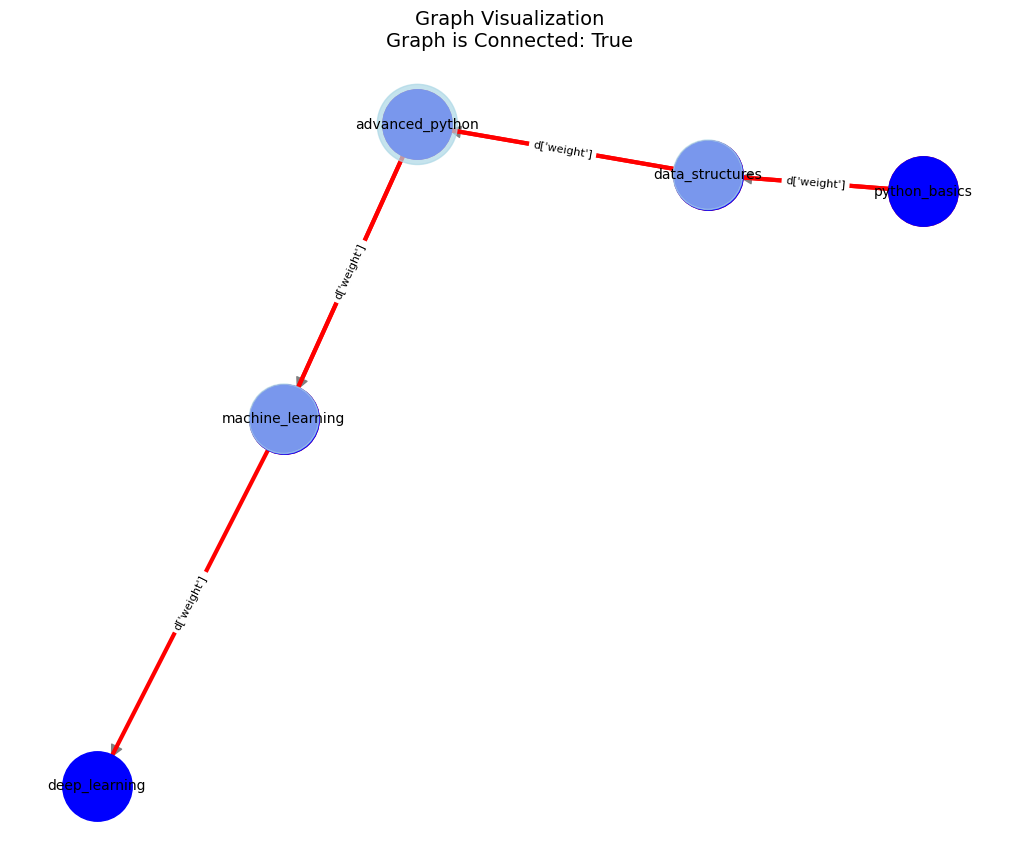

In [19]:
from operator import is_
import networkx as nx
import matplotlib.pyplot as plt

# Topics and relationships
topics = {
    'python_basics': {'difficulty': 'begginer'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'},
    'deep_learning': {'difficulty': 'advanced'}
}

relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7}),
    ('machine_learning', 'deep_learning', {'weight': 0.6})
]

# Create the graph
G = nx.DiGraph()
for topics, metadata in topics.items():
    G.add_node(topics, **metadata)
G.add_edges_from(relationships)


# Find the shortest path (including another path for demonstration)
shortest_path1 = nx.shortest_path(G, 'python_basics', 'machine_learning')
shortest_path2 = nx.shortest_path(G, 'python_basics', 'deep_learning')
print(f"Shortest path 1 from 'python_basics' to 'machine_learning': {shortest_path1}")
print(f"Shortest path 2 from 'python_basics' to 'deep_learning': {shortest_path2}")

# Calculate betweenness centrality
centrality = nx.betweenness_centrality(G)
print(f"Betweenness centrality for each node: {centrality}")
print("\n--- Betweenness Centrality Explanation ---")
print("Betweenness centrality is a measure of a node's importance based on the number of shortest paths that pass through it.")
print("Nodes with high betweenness centrality are important for connecting different parts of the graph, acting as bridges or intermediaries.")

# Check if the graph is connected
is_connected = nx.is_connected(G.to_undirected())
print(f"Is the graph connected {is_connected}")

# Define positions for nodes
pos = nx.spring_layout(G)

# Draw the basic graph with node colors based on difficulty
node_colors = {
    'begginer': 'lightgreen',
    'intermediate': 'skyblue',
    'advanced': 'orange'
}
node_color_list = [node_colors[data['difficulty']] for _, data in G.nodes(data=True)]

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, with_labels=True, node_color=node_color_list,
    node_size=2000, font_size=10, arrowsize=20, edge_color='gray'
)

# Highlight the shortest paths with different colors
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path1, node_color='red', node_size=2500)
nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path1[i], shortest_path1[i + 1]) for i in range(len(shortest_path1) - 1)], edge_color='red', width=3)

nx.draw_networkx_nodes(G, pos, nodelist=shortest_path2, node_color='blue', node_size=2500)
nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path2[i], shortest_path2[i + 1]) for i in range(len(shortest_path2) - 1)], edge_color='red', width=3)

# Add edge labels to show weights
edge_labels = {(u, v): f"d['weight']" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Betweenness centrality - Adjust node size based on centrality
node_sizes = [v * 10000 for v in centrality.values()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.7)

# Add the title and explanation
plt.title(f"Graph Visualization\nGraph is Connected: {is_connected}", fontsize=14)

# Show the plot
plt.show()

In [20]:
# Save to GraphML(networkX native)
nx.write_graphml(G, 'learning_path.graphml')

Degree centrality for each node: {'python_basics': 0.25, 'data_structures': 0.5, 'advanced_python': 0.5, 'machine_learning': 0.5, 'deep_learning': 0.25}
Degree centrality measures the number of edges connected to a node. Nodes with higher degreee centrality are more central.
Betweenness centrality for each node: {'python_basics': 0.0, 'data_structures': 0.25, 'advanced_python': 0.3333333333333333, 'machine_learning': 0.25, 'deep_learning': 0.0}
Betweenness centrality is a measure of a node's importance based on the number of shortest paths that pass through it.
Closeness centrality for each node: {'python_basics': 0.0, 'data_structures': 0.25, 'advanced_python': 0.3333333333333333, 'machine_learning': 0.375, 'deep_learning': 0.4}
Closeness centrality measures the average distance from a node to all other nodes in the graph.


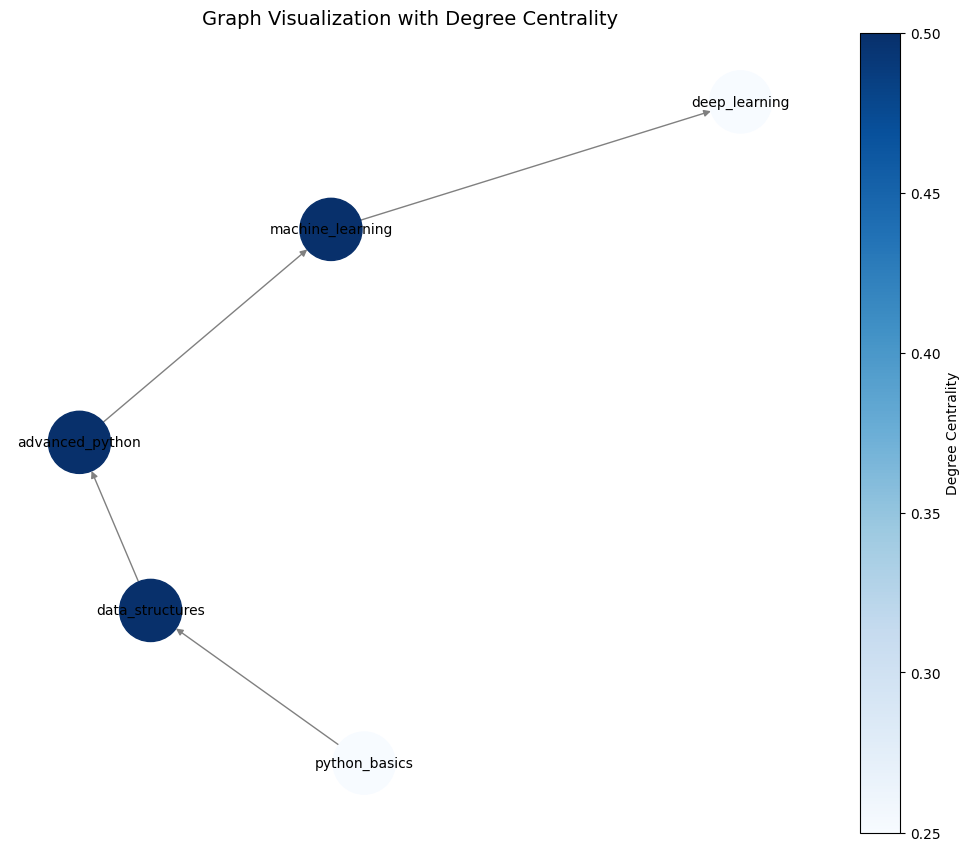

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Tpics and relationships
topics = {
    'python_basics': {'difficulty': 'begginer'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'},
    'deep_learning': {'difficulty': 'advanced'}
}

relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7}),
    ('machine_learning', 'deep_learning', {'weight': 0.6})
]

# Create the graph
G = nx.DiGraph()
for topics, metadata in topics.items():
    G.add_node(topics, **metadata)
G.add_edges_from(relationships)

# Calculate centrality measures
degree_cent = nx.degree_centrality(G)
print(f"Degree centrality for each node: {degree_cent}")
print("Degree centrality measures the number of edges connected to a node. Nodes with higher degreee centrality are more central.")

betweenness_cent = nx.betweenness_centrality(G)
print(f"Betweenness centrality for each node: {betweenness_cent}")
print("Betweenness centrality is a measure of a node's importance based on the number of shortest paths that pass through it.")

closeness_cent = nx.closeness_centrality(G)
print(f"Closeness centrality for each node: {closeness_cent}")
print("Closeness centrality measures the average distance from a node to all other nodes in the graph.")

# Define postions for nodes
pos = nx.spring_layout(G)

# Color nodes based on degree centrality
node_color_degree = [degree_cent[node] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, with_labels=True, node_color=node_color_degree,
    node_size=2000, font_size=10, cmap=plt.cm.Blues, edge_color='gray'
)

# Degree centrality explanation
plt.title(f"Graph Visualization with Degree Centrality", fontsize=14)

# Add color bar for degree centrality
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(node_color_degree), vmax=max(node_color_degree)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label="Degree Centrality")  # Specify ax here

# Show the plot
plt.show()

1. **Community Detection**: This algorithm groups nodes into communities where nodes within the same community are densely connected. It helps in understanding the modular structure of the graph.

--- Community Detection ---
Community detection identifies groups of nodes that are more connected to each other than to the rest of the network.
Detected communities (node groups):
Community 1: frozenset({'machine_learning', 'advanced_python', 'deep_learning'})
Community 2: frozenset({'data_structures', 'python_basics'})
2. **Path Analysis**: This finds all possible paths between two nodes. It is useful for exploring the possible routes in the network.

--- Path Analysis ---
All possible paths from 'python_basics' to 'machine_learning':
['python_basics', 'data_structures', 'advanced_python', 'machine_learning']
3. **Cycle Detection**: Detects cycles where nodes can return to themselves by following edges. Cycles are important in graph theory and can indicate dependencies or loops.

--- Cycle

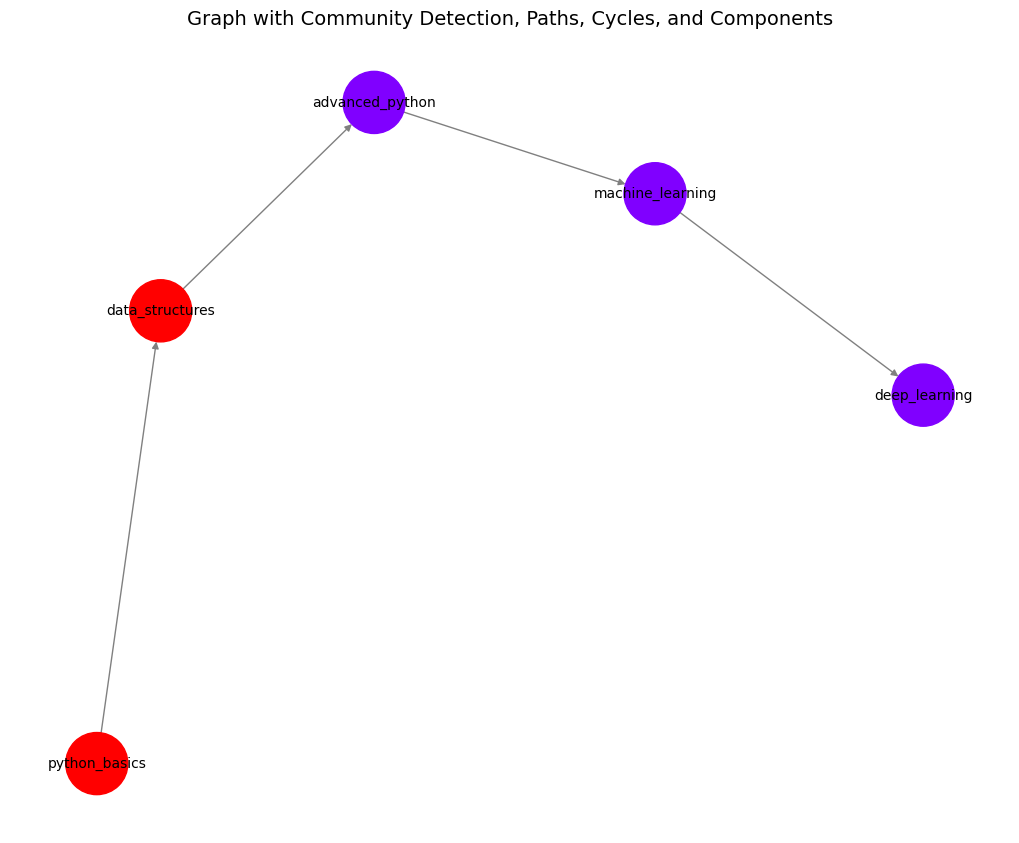

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

topics = {
    'python_basics': {'difficulty': 'begginer'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'},
    'deep_learning': {'difficulty': 'advanced'}
}

relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7}),
    ('machine_learning', 'deep_learning', {'weight': 0.6})
]

# Crate the graph
G = nx.DiGraph()
for topics, metadata in topics.items():
    G.add_node(topics, **metadata)
G.add_edges_from(relationships)

# Community detection (Greedy Modularity Communities)
communities = list(nx.community.greedy_modularity_communities(G))
print("1. **Community Detection**: This algorithm groups nodes into communities where nodes within the same community are densely connected. It helps in understanding the modular structure of the graph.")
print("\n--- Community Detection ---")
print("Community detection identifies groups of nodes that are more connected to each other than to the rest of the network.")
print("Detected communities (node groups):")
for idx, community in enumerate(communities):
    print(f"Community {idx + 1}: {community}")

# Path analysis
all_paths = list(nx.all_simple_paths(G, 'python_basics', 'machine_learning'))
print("2. **Path Analysis**: This finds all possible paths between two nodes. It is useful for exploring the possible routes in the network.")
print("\n--- Path Analysis ---")
print("All possible paths from 'python_basics' to 'machine_learning':")
for path in all_paths:
    print(path)

# Cycle detection
cycles = list(nx.simple_cycles(G))
print("3. **Cycle Detection**: Detects cycles where nodes can return to themselves by following edges. Cycles are important in graph theory and can indicate dependencies or loops.")
print("\n--- Cycle Detection ---")
print("Cycles detected in the graph (if any):")
if cycles:
    for cycle in cycles:
        print(f"Cycle: {cycle}")
else:
    print("No cycles detected.")

# Connected components
components = list(nx.connected_components(G.to_undirected()))
print("4. **Connected Components**: Identifies disconnected subgraphs (components). If a graph has more than one component, it means some nodes cannot be reached from others.")
print("\n--- Connected Components ---")
print("Connected components (disconnected subgraphs) in the graph:")
for component in components:
    print(f"Component: {component}")

# Visualization settings
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(10, 8))

# Community detection visualization (color each community differently)
community_color_map = {}
for idx, community in enumerate(communities):
    for node in community:
        community_color_map[node] = idx

node_color_communities = [community_color_map.get(node, -1) for node in G.nodes]
nx.draw(
    G, pos, with_labels=True, node_color=node_color_communities,
    node_size=2000, font_size=10, cmap=plt.cm.rainbow, edge_color='gray'
)

# Highlight the cycles in the graph (with bold edges for visual clarity)
for cycle in cycles:
    cycle_edges = list(zip(cycle, cycle[1:] + [cycle[0]]))  # Create the cycle edges
    nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color='red', width=3)

# Title
plt.title("Graph with Community Detection, Paths, Cycles, and Components", fontsize=14)

# Show the plot
plt.show()

1. **Similar Topics Based on Connections (Jaccard Coefficient)**: Measures similarity between two nodes based on the proportion of shared neighbors in the graph.
2. **Prerequisites (Ancestors)**: Topics that need to be learned first before a given topic (i.e., prerequisites).
3. **Descendants**: Topics that depend on a given topic (i.e., topics that come later in the learning path).
4. **Impact of Removing a Node**: The number of topics that would be affected or no longer accessible if a node (topic) is removed from the graph.


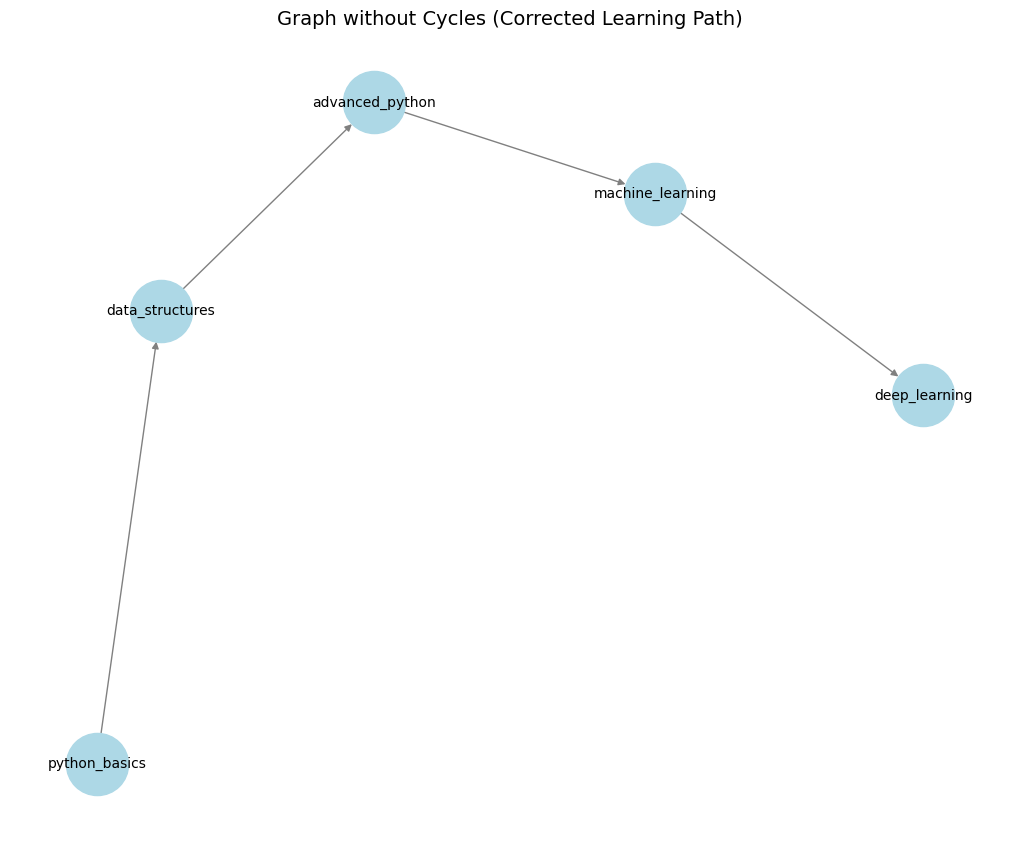


--- Similar Topics Based on Connections (Jaccard Coefficient) ---
The Jaccard coefficient measures the similarity between two nodes based on shared neighbors.
Similarity between 'data_structures' and 'machine_learning': 0.33

--- Prerequisites and Descendants ---
Prerequisites (ancestors) for 'machine_learning': {'data_structures', 'advanced_python', 'python_basics'}
Descendants (dependent topics) for 'python_basics': {'data_structures', 'advanced_python', 'deep_learning', 'machine_learning'}

--- Impact of Removing a Node ---
Impact of removing 'data_structures': 3 affected topics.


In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Topics and relationships
topics = {
    'python_basics': {'difficulty': 'beginner'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'},
    'deep_learning': {'difficulty': 'advanced'}
}

relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7}),
    # Removed the edge causing the cycle
    # ('deep_learning', 'python_basics', {'weight': 0.5}),  # This was causing the cycle
    ('machine_learning', 'deep_learning', {'weight': 0.6}),  # Adjusted the flow
]

# Create the graph
G = nx.DiGraph()
for topic, metadata in topics.items():
    G.add_node(topic, **metadata)
G.add_edges_from(relationships)

# Convert the directed graph to an undirected one for Jaccard Coefficient calculation
G_undirected = G.to_undirected()

# Find similar topics using Jaccard Coefficient (now works on the undirected graph)
similar_topics = list(nx.jaccard_coefficient(G_undirected, [('data_structures', 'machine_learning')]))
print("1. **Similar Topics Based on Connections (Jaccard Coefficient)**: Measures similarity between two nodes based on the proportion of shared neighbors in the graph.")

# Check prerequisites (ancestors) and descendants
ancestors = nx.ancestors(G, 'machine_learning')
print("2. **Prerequisites (Ancestors)**: Topics that need to be learned first before a given topic (i.e., prerequisites).")

descendants = nx.descendants(G, 'python_basics')
print("3. **Descendants**: Topics that depend on a given topic (i.e., topics that come later in the learning path).")

# Find affected topics if a node is removed (e.g., 'data_structures')
impact = len(nx.descendants(G, 'data_structures'))
print("4. **Impact of Removing a Node**: The number of topics that would be affected or no longer accessible if a node (topic) is removed from the graph.")


# Visualization settings
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, with_labels=True, node_color='lightblue',
    node_size=2000, font_size=10, edge_color='gray'
)

# Title
plt.title("Graph without Cycles (Corrected Learning Path)", fontsize=14)

# Show the plot
plt.show()

# Print explanations and results
print("\n--- Similar Topics Based on Connections (Jaccard Coefficient) ---")
print("The Jaccard coefficient measures the similarity between two nodes based on shared neighbors.")
for u, v, p in similar_topics:
    print(f"Similarity between '{u}' and '{v}': {p:.2f}")

print("\n--- Prerequisites and Descendants ---")
print(f"Prerequisites (ancestors) for 'machine_learning': {ancestors}")
print(f"Descendants (dependent topics) for 'python_basics': {descendants}")

print("\n--- Impact of Removing a Node ---")
print(f"Impact of removing 'data_structures': {impact} affected topics.")

In [1]:
!pip install networkx rdflib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 20.3 MB/s eta 0:00:00


Approach 1: Using Networkx
Shortest Path: python_basics->data_structures->advanced_python->bioimage_analysis
 


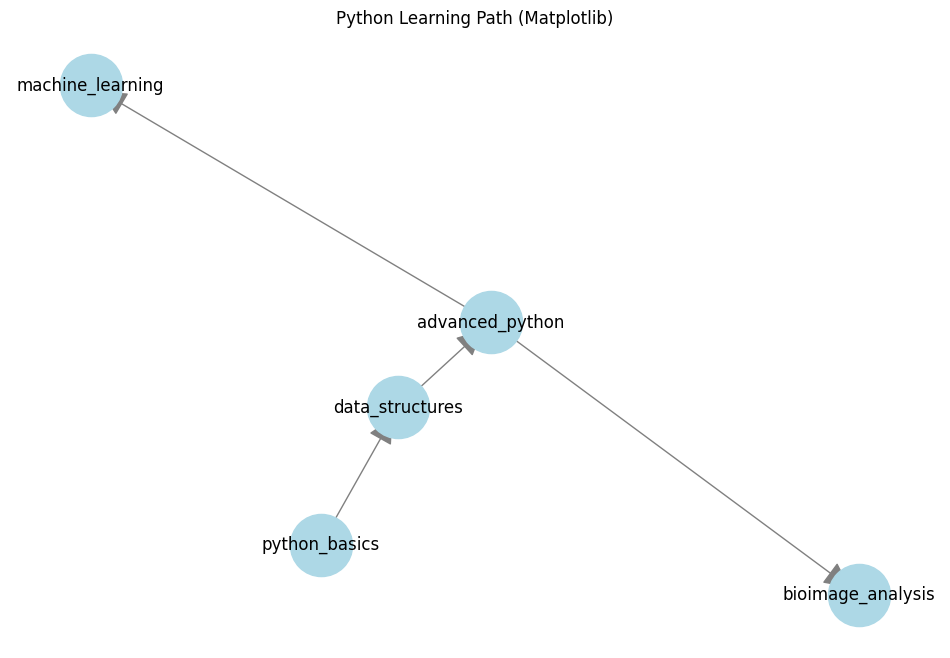

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Approach 1: Using Networkx
print("Approach 1: Using Networkx")

# Create a directed graph
G = nx.DiGraph()

# Define nodes (topics) with metadata
topics = {
    'python_basics': {                                #topic
        'difficulty': 'beginner',                       #metadata
        'description': 'Basic Python concepts'          #metadata
    },
    'data_structures': {
        'difficulty': 'intermediate',
        'description': 'Python data structures'
    },
    'advanced_python': {
        'difficulty': 'advanced',
        'description': 'Advanced Python concepts'
    },
    'machine_learning': {
        'difficulty': 'advanced',
        'description': 'Machine Learning with Python'
    },
    'bioimage_analysis': {
        'difficulty': 'advanced',
        'description': 'Bioimage Analysis with Python'
    }
}

# Add nodes to graph, along with metadata. e.g., create a node 'python_basics' with attributes {'difficulty': 'beginner', 'description': 'Basic Python concepts'}

for topic, metadata in topics.items():
  G.add_node(topic, **metadata)

# Add edges (relationships) with weights
relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7}),
    ('advanced_python', 'bioimage_analysis', {'weight': 0.7})
]

# Add edges to the graph
G.add_edges_from(relationships)

# Query: Find the shortest path from python_basics to bioimage_analysis
shortest_path = nx.shortest_path(G, source='python_basics', target='bioimage_analysis')
print("Shortest Path:", "->".join(shortest_path))
print(" ")

# Visualize using Matplotlib
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
nx.draw_networkx_labels(G, pos)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=40)

plt.title("Python Learning Path (Matplotlib)")
plt.axis('off')
plt.show()

In [ ]:
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import RDF, RDFS

# Create a RDF graph
g = Graph()

# Define a namespace for our ontology
EX = Namespace("http://example.org/")

# Add nodes (topics) as RDF triples
topics = {
    'python_basics': {
        'difficulty': 'beginner',
        'description': 'Basic Python concepts'
    },
    'data_structures': {
        'difficulty': 'intermediate',
        'description': 'Python data structures'
    },
    'advanced_python': {
        'difficulty': 'advanced',
        'description': 'Advanced Python concepts'
    },
    'machine_learning': {
        'difficulty': 'advanced',
        'description': 'Machine Learning with Python'
    },
    'bioimage_analysis': {
        'difficulty': 'advanced',
        'description': 'Bioimage Analysis with Python'
    }
}

# Add topics and metadata to the RDF graph
# Each g.add() call creats an RDF tiple (subject, predicate, object):
# Subject: EX[topic] (the resource being described, e.g. python_basics)
# Predicate: RDFS.label, EX.difficutly, EX.description (the property or relationship)
# Object: Literal(topic), Literal(metadata['difficulty']), Literal(metadata['description']) (the value)
# Note: A literal can be any data value such as a string, a number, or a date (as opposed to URI)

for topic, metadata in topics.items():
    topic_uri = EX[topic]
    print(topic_uri)    # http://example.org/python_basics etc.
    g.add((topic_uri, RDF.label, Literal(topic)))
    g.add()